atividade 2 
aluno : vilgledyson nobrega dos santos
professor : ricardo roberto 


In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
# Carregando o conjunto de dados Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names



In [3]:
# Transformando os dados em um DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(y, iris.target_names)

In [4]:
# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Aplicando o PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [6]:
# Variância explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Visualizando a variância explicada por cada componente principal
print("Variância explicada por cada componente principal:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.2%}")


Variância explicada por cada componente principal:
PC1: 72.96%
PC2: 22.85%


In [7]:
# Criando um DataFrame com os dados transformados
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['species'] = df['species']


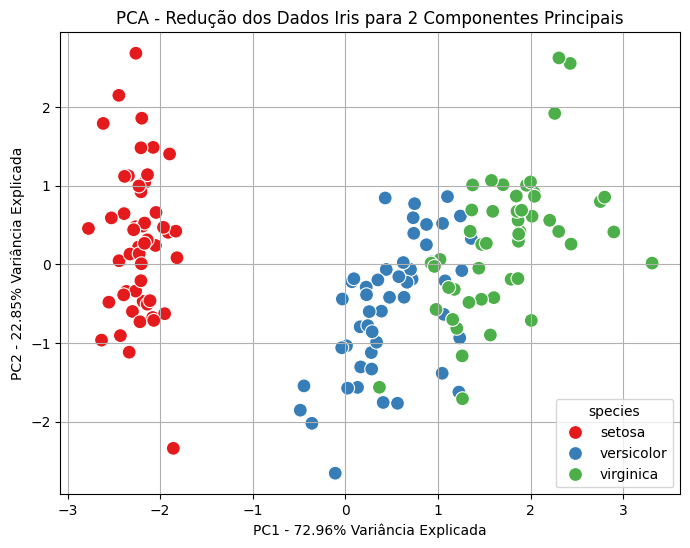

In [8]:
# Visualizando os dados reduzidos
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=df_pca, palette='Set1', s=100)
plt.title('PCA - Redução dos Dados Iris para 2 Componentes Principais')
plt.xlabel(f'PC1 - {explained_variance[0]*100:.2f}% Variância Explicada')
plt.ylabel(f'PC2 - {explained_variance[1]*100:.2f}% Variância Explicada')
plt.grid(True)
plt.show()
